# Final Project
## IPH: Text Analysis
## Jeremy Goldstein
#### Note: This project has been adapted from coursework/assignments provided by and for Drs. Basu, Pentacost, and Biggs.

In the 21st century, the threat to and importance of journalism have never been greater. As such, the goal of this project is to study the language of various news outlets using natural language processing methods to determine if there are any discernible patterns as to how news is reported and what distinguishes sites from one another. Natural language processing techniques will be used to analyze various news sources to investigate what quantitative and qualitative conclusions can be drawn.

## Installation

In [327]:
#!pip3 uninstall -y textacy
#!/Users/Jeremy/anaconda3/bin/pip install textacy
#!/Users/Jeremy/anaconda3/bin/python -m spacy download en

!/Users/Jeremy/anaconda3/bin/pip install textblob
#!/Users/Jeremy/anaconda3/bin/python -m spacy download en_core_web_sm

#!echo $PATH
#!export PATH=/Users/Jeremy/anaconda3/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin; pip3 install gensim
#!conda install -y gensim
#!jupyter kernelspec list 
#!ls /Users/Jeremy/anaconda3/bin/pip*
#!ls -l /Users/Jeremy/anaconda3/bin/pip
#!which pip3

    100% |████████████████████████████████| 634kB 1.6MB/s ta 0:00:01
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Importing relavent packages

In [2]:
import textacy, spacy 
nlp = spacy.load('en')
nlp.max_length = 9999999
en = textacy.load_spacy('en_core_web_sm', disable=('parser',))
spacy.load('en_core_web_lg')
from nltk.tokenize import RegexpTokenizer 
from nltk import word_tokenize
import re #For searching
from nltk.corpus import wordnet as wn
import newspaper #For getting text. https://newspaper.readthedocs.io/
from nltk.corpus import stopwords
from nltk.corpus import names as PersonalNames
import nltk.data
import string
from collections import Counter
import nltk
import matplotlib.pyplot as plt1
import glob
from prettytable import PrettyTable
from nltk.book import *
%matplotlib inline
import gensim 
import numpy as np
print (spacy.__version__)
print (textacy.__version__)

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908
2.0.11
0.6.0


In [16]:
import gensim
import sklearn
import seaborn as sns
import codecs, re, textwrap
from spacy import displacy
import textwrap
import textacy.keyterms
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import tabletext
from gensim import corpora, models, similarities
from gensim import corpora, models, similarities
from gensim.models.wrappers import LdaMallet
from collections import defaultdict, Counter
import textwrap
import matplotlib.pyplot as plt
from gensim.matutils import corpus2dense
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.spatial.distance import squareform
import pandas as pd
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import time
from textblob.classifiers import NaiveBayesClassifier
from gensim import corpora, matutils
from sklearn.naive_bayes import BernoulliNB
import math
import random

## Define database

The first step in approaching the analysis is to determine the news outlets to study. The sites chosen—Breitbart CNN, Economist, Fox, Mother Jones, New York Times, Vox, Wall Street Journal, Yahoo—were based on two criteria.

First popularity, gauged by online traffic. Two thirds of the media outlets chosen amass more than 100 million page views in one month, qualifying them to be among the most 100 most read U.S. media publications, according to data analytics firm SimilarWeb. According to Amazon's Website Traffic, Statistics and Analytics service, the traffic of the sites’ home pages used in this report; ranked in order of popularity: Yahoo, CNN, New York Times, Fox, Wall Street Journal, Vox, Breitbart, Economist, Mother Jones.

The other measure used involved including sources from across the political spectrum. A 2014 Pew Research Survey, analyzing political leanings of major news sources would arrange from ideologically liberal to ideologically conservative the chosen outlets as: New York Times, Economist, CNN, Yahoo, WSJ, Fox, Breitbart. Although the Pew Research study examined the audience of each outlet’s political leanings, the ideology of a publication’s readership is an adequate proxy for the ideology of the publication. A “political bias” guide published by the University of Michigan was used to supplement the metrics from the Pew Research Center, which generally categorized news sources into different political groups: Mother Jones as “far left,” New York Times as “towards the left,” Wall Street Journal as “centrist,” and Fox News as “towards the right.” Finally, Vox’s founder and former-Washington Post writer, Ezra Klein noted in a 2017 interview that “[Vox’s] audience data...leans a bit left.”

For each media outlet analyzed, a corpus was created by collecting articles from the outlet April 4, 2018 to April 25, 2018. During this period, once a day, dozens of articles hosted in the politics subsection of the online editions were retrieved and added to the corpus of that site. 

The steps involved: 1. iterating over the politics section of each new site so as to exclude other non-indicative sections such as sports, 2. using the build() method of the Newspaper3k library—designed for article scraping and curation—to accumulate all of the articles at that URL, 3. writing the result to a file stored on the researcher’s local machine. 

In [37]:
#Selected media outlets based on either 
#most traffic according to https://www.similarweb.com/blog/us-media-publications-ranking-april-2017
#or bias according to http://guides.lib.umich.edu/c.php?g=637508&p=4462444
news_urls = [
 'http://www.breitbart.com/news/topic/politics/',
 'http://www.cnn.com/politics',
 'http://www.economist.com/topics/politics',
 'http://www.foxnews.com/politics',
 'http://www.motherjones.com/politics/',
 'http://www.nytimes.com/politics',
 'http://www.vox.com/policy-and-politics',
 'http://www.wsj.com/news/politics',
 'http://www.yahoo.com/news/politics/']

def saveall(date):
    for site in news_urls:
        create_and_save(create_corpus(site), r"/Users/Jeremy/Documents/Computational Linguistics/files/" + str(site[site.index('www')+4:site.index('.com')]) + "/" + date + '.txt')

def create_and_save(corpus, path):
    fh = open(path, "w+")
    fh.write(corpus)
    fh.close()
    
def create_corpus(site):
    corpus_text = ""
    corpus_raw = newspaper.build(site, language='en')
    for i in range(corpus_raw.size()):
        article = corpus_raw.articles[i]
        article.download()
        article.parse()
        corpus_text += article.text
    print (str(site[site.index('www.')+4:site.index('.com')]) + " has " + str(corpus_raw.size()) + " articles and " + str(len(corpus_text.split())) + " words")
    return corpus_text
    
#Run once a day    
saveall(date='4_25_18')

breitbart has 0 articles and 0 words
cnn has 5 articles and 3934 words
economist has 45 articles and 21167 words
foxnews has 204 articles and 68983 words
motherjones has 40 articles and 31923 words
nytimes has 129 articles and 84119 words
vox has 114 articles and 158841 words
wsj has 153 articles and 31576 words
yahoo has 162 articles and 73128 words


## Main methods: Accumulate, clean, and analyze texts

The following attributes were determined to be so weakly correlated that their relationship approaches randomness: average sentence length and popularity, average word length and bias, content fraction and popularity, lexical diversity and popularity.† One reasonable way to explain why there seems to be no strong correlation in content fraction, for example, is that a measurement that makes no distinction beyond function and content words is too coarse of a tool for a meaningful difference to emerge. This is supported by the fact that all corpuses have a very similar trend in their relative frequency of each part of speech and readability scores.

Yet there is a notable correlation in three areas; in increasing strength: average sentence length increases with bias, average word length decreases with popularity, and punctuation percent decreases with popularity.† The combination of the latter two results strongly suggest that audiences are more attracted to less technical, easier-to-digest articles. Whether, over time, outlets have modified their content to cater to their readers’ bite-sized preferences and byte-sized, on-the-go readership habits would be an interesting area of further research. 

† https://drive.google.com/file/d/1nS2X9T6fl6Px5KKkuNq6B2uI6zThZC7Q/view?usp=sharing 

/Users/Jeremy/Documents/Computational Linguistics/files/breitbart/4_14_18.txt
/Users/Jeremy/Documents/Computational Linguistics/files/breitbart/4_15_18.txt
/Users/Jeremy/Documents/Computational Linguistics/files/breitbart/4_16_18.txt
/Users/Jeremy/Documents/Computational Linguistics/files/breitbart/4_17_18.txt
/Users/Jeremy/Documents/Computational Linguistics/files/breitbart/4_18_18.txt
/Users/Jeremy/Documents/Computational Linguistics/files/breitbart/4_19_18.txt
/Users/Jeremy/Documents/Computational Linguistics/files/breitbart/4_23_18.txt
/Users/Jeremy/Documents/Computational Linguistics/files/breitbart/4_25_18.txt
breitbart created with initial, unedited 900000 characters 
/Users/Jeremy/Documents/Computational Linguistics/files/cnn/4_12_18.txt
/Users/Jeremy/Documents/Computational Linguistics/files/cnn/4_14_18.txt
/Users/Jeremy/Documents/Computational Linguistics/files/cnn/4_15_18.txt
/Users/Jeremy/Documents/Computational Linguistics/files/cnn/4_16_18.txt
/Users/Jeremy/Documents/Comp

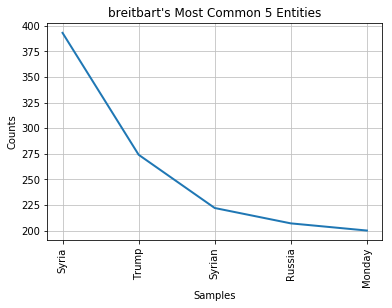

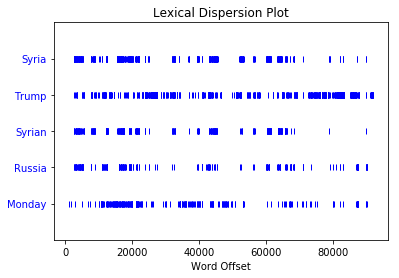

Common contexts of 'Monday, Russia, Syrian, Trump, Syria' in breitbart
Monday: halted_defense day_ohtani announcement_affect announced_would
early_community likely_russian court_rejected trading_adding
said_asked america_meet returned_johnson 7_chanted 7_outside
house_said announced_treasury indicated_announcement said_the
ruled_parent escalated_comey authority_reaching
Russia: power_turkey iran_turkey syria_deny sanction_support nation_need
note_vetoed normal_covering iran_allow iran_key serbia_key
ally_western assad_deny misinformation_syria weapon_veto ally_denied
governor_region urging_join regularly_even defied_take leader_iran
Syrian: weapon_regime britain_target the_regime support_president
stop_opposition near_capital discus_condition ally_president
side_crisis attack_chemical haley_president attack_military
year_conflict action_president missile_military p_state the_government
sunday_newspaper met_president attack_force
Trump: president_wanted donald_british donald_tweet donal

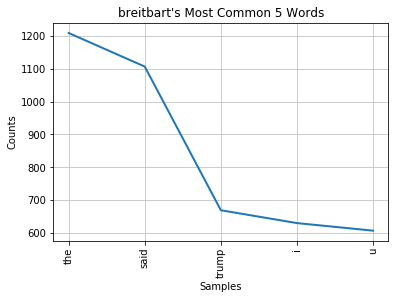

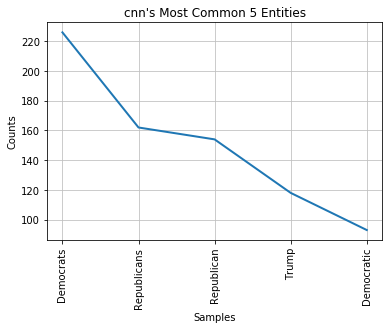

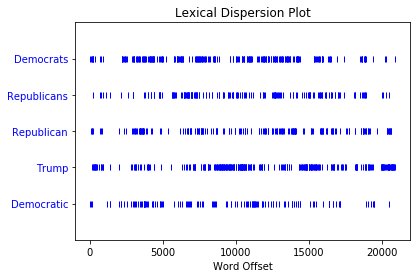

Common contexts of 'Democratic, Trump, Republican, Republicans, Democrats' in cnn
Democratic: profile_candidate the_congressional the_support challenge_gov
group_lawmaker united_party saying_party 62_vote still_base seat_rep
county_250 10_senator lean_8 voting_offer vulnerable_takeover lean_03
lean_nj show_strength suburb_recent make_challenger
Trump: donald_decision run_republican sign_take said_must
strike_administration demanding_come 2018_decision president_decision
president_adamant tweeted_action call_present added_must
could_presidency governor_republican president_basically 4_gop
donald_cnn fight_washington donald_vote state_year
Republican: prop_nominee likely_lean lean_read trump_party majority_backed
plan_worried but_national worry_incredibly trump_gov
support_leadership democrat_actually if_lose senate_group meet_county
base_also texas_rep kentucky_sen vote_it sign_hope reflect_facing
Republicans: ('The following word(s) were not found:', 'republicans')
Democrats: ('The fol

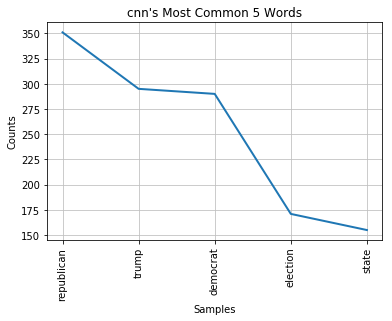

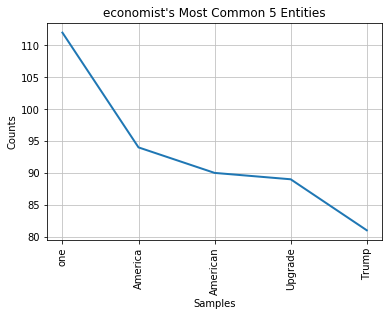

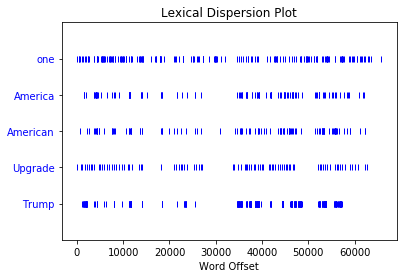

Common contexts of 'Trump, Upgrade, American, America, one' in economist
Trump: leadership_administration donald_desk president_soon mr_hope
donald_former mr_legal mr_campaign figure_campaign mr_former mr_took
mr_became mr_islam mr_yet mr_pardon mr_new mr_trying mr_fired
mr_repeatedly mr_hoped donald_contacted
Upgrade: newsletter_inbox
American: organisation_state it_conservative claim_convention
liberal_commentator understand_society many_history article_all
create_medium issue_politics result_policy problem_make
funding_counterpart north_free one_aircraft foul_sanction
alliance_official fear_transfer love_company third_concerned
young_employee
America: aim_business point_debt direction_face believe_locked
meddling_election problem_get looked_model surprised_heavy cause_for
god_cold returned_enemy show_work infect_west agent_done get_attention
expectation_back argentina_the study_made police_suspended
politics_beyond
one: lead_round later_would reasonable_possible include_honduras
rat

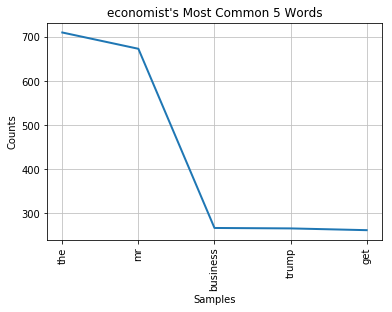

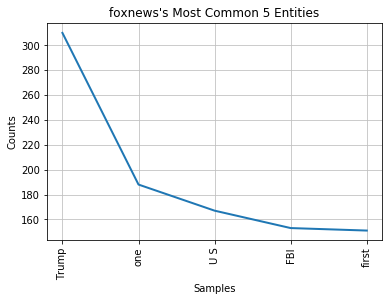

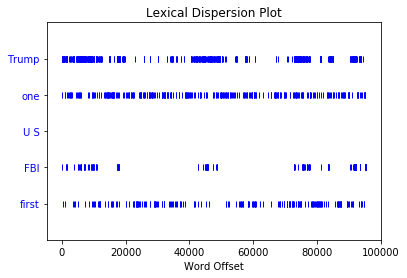

Common contexts of 'first, FBI, U S, one, Trump' in foxnews
first: worker_right become_city said_public the_called wonderful_section
the_hour comey_tv took_place particularly_amendment america_tomi
airing_interview website_glance comey_stop i_born lack_tour
cancer_call tax_24 house_week trump_deputy month_day
FBI: trump_special accompanied_official outraged_raid doj_effort
an_affidavit napolitano_raid impeach_director is_president
furious_cohen following_raid turned_memo view_memo threatened_director
show_justice department_turned department_history doj_official
department_took armed_agent thursday_raid
U S: ('The following word(s) were not found:', 'u s')
one: saying_like war_removed immigrant_council 1_file guilty_count
concerned_lawmaker amendment_highest said_take around_could
republican_four change_week ryan_rare based_lawmaker spoke_nun
podcast_fastest the_greg bream_one one_engaging plea_person said_time
Trump: president_pick reported_fbi discussed_said tillerson_fired fix_may
p

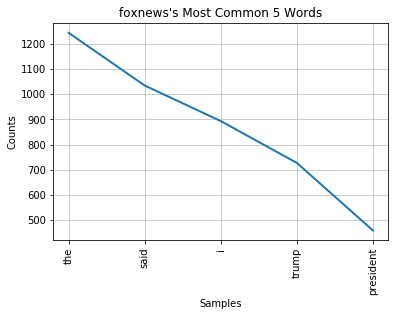

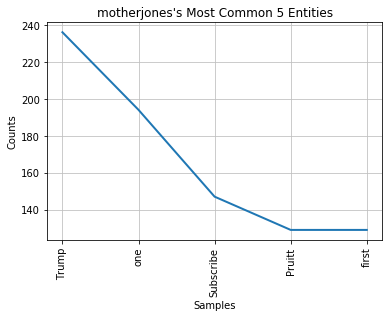

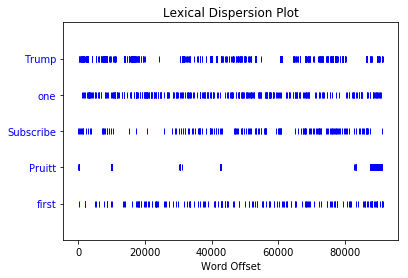

Common contexts of 'first, Pruitt, Subscribe, one, Trump' in motherjones
first: in_year i_journalist novak_source believed_heard russert_time
worst_clear the_major it_time night_detail convince_lady obama_lady
painful_lady chmielewski_started measure_the approve_class type_place
at_handful might_president set_contact received_place
Pruitt: scott_notice investigation_spending spending_recently
critic_arrangement documenting_travel including_chief scott_head
sign_interview before_ethical discussion_tenure profile_in
office_already process_driven scott_the served_deputy concern_action
spoke_lavish congress_tenure epa_chief learned_spending
Subscribe: trust_free
one: right_time cheney_leading check_administration explanation_supported
closely_cohen last_two consume_drink consumption_drink le_hundred
going_daily le_day associated_two risk_reason dan_study shot_demand
civil_combative compared_i homan_handful say_former homan_making
Trump: move_era donald_campaign donald_former j_realdonaldtr

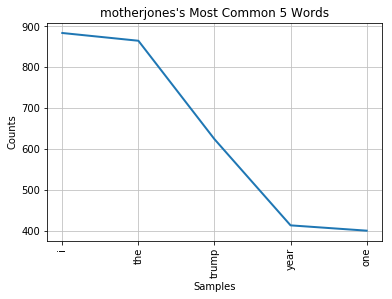

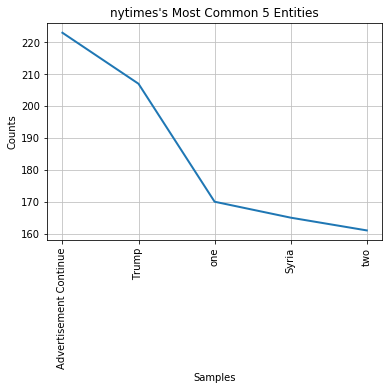

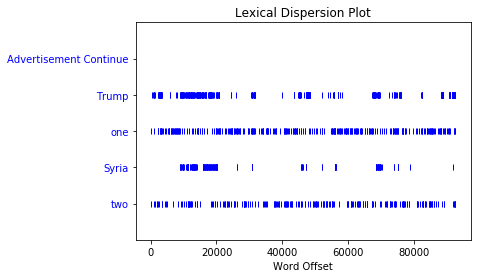

Common contexts of 'two, Syria, one, Trump, Advertisement Continue' in nytimes
two: approved_year tension_country said_e outside_agency office_men
public_democrat past_week newsletter_men imagine_trump takeaway_day
writer_rolling there_sculpture executed_player drive_suicide
photo_year the_bill syria_box tweet_word learned_lesson airstrikes_day
Syria: provoking_patron really_others crime_stark steer_resolution see_two
strategy_heather ground_belies deterring_using target_response
broader_strategy strike_going including_the strike_in people_i
airstrikes_right strike_vital attacking_without retaliate_use
strike_european situation_a
one: go_irresponsible chose_person combat_part he_several pas_mr late_night
done_longtime loyalty_one one_dinner testimony_senator gave_one
one_interaction noon_chaos decision_night law_us only_storm
younger_basic least_way attic_thing reveals_thief
Trump: like_i mr_right mr_would donald_chose mr_remaining president_called
a_transition chmielewski_administrati

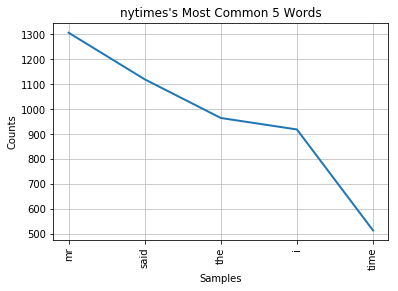

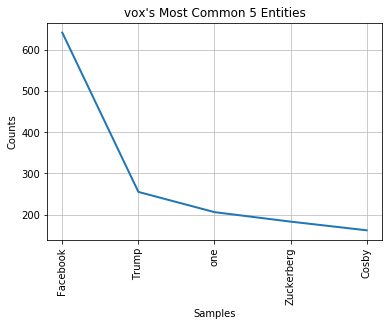

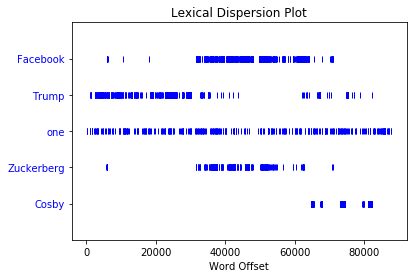

Common contexts of 'Cosby, Zuckerberg, one, Trump, Facebook' in vox
Cosby: bill_drugged encounter_say left_said convict_assault story_they
said_drugged thought_assaulted one_accuser week_trial
establish_pattern constand_denied examination_defense encounter_yet
assaulted_or so_raped narrative_four met_talent said_offered said_gave
remembers_trying
Zuckerberg: mr_went mark_flew mark_really sorry_core apology_making photo_core
pressed_information mark_claimed and_correct still_user analytica_said
mark_testified while_confronted facebook_detailed klein_admitted
across_said finance_seemed step_change mark_apology sc_graham
one: like_gig identical_irs sent_irs pay_allowing ceo_one one_country
intuit_voice term_mildly happened_specific utterly_trump in_dated
september_main possible_person specific_showed revealed_trip
meeting_alleged called_time for_said for_session legalization_anti
Trump: donald_despite cut_tweet war_volatile some_trade wanted_gop
statement_called did_lawyer donald_presiden

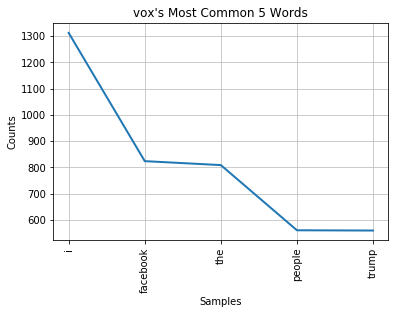

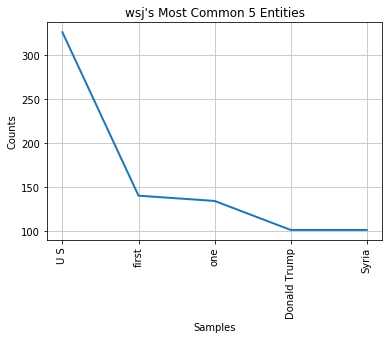

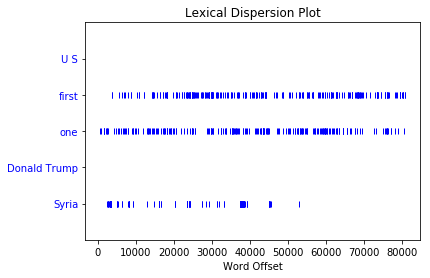

Common contexts of 'Syria, Donald Trump, one, first, U S' in wsj
Syria: associated_chemical beirut_government northern_with material_state
back_attack troop_defeat eastern_former attack_last
airstrikes_saturday strike_april strike_struck attack_crime
catastrophe_said wanted_suspected strike_aimed two_international s_the
violating_sanction strike_mean much_chemical
Donald Trump: ('The following word(s) were not found:', 'donald trump')
one: order_designed transformation_drawing fit_note 2018_new
describes_meeting almost_piece fund_important army_time
miller_president nearly_fourth appears_moving movie_over inc_getting
network_world new_many if_thing he_60 carolina_place executive_but
conducted_people
first: america_action revealed_time the_example struggled_get bank_quarter
artist_three competed_half end_week deal_step disclosing_time
ushered_wave show_decade reality_heyday start_quarter even_correction
time_quarter 3_quarter since_quarter billion_time a_read
U S: ('The following word(s

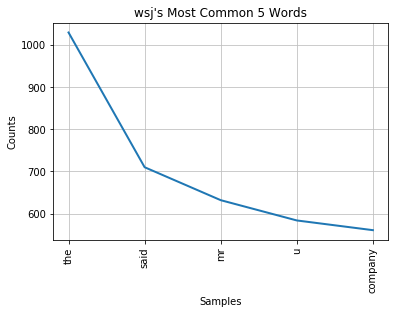

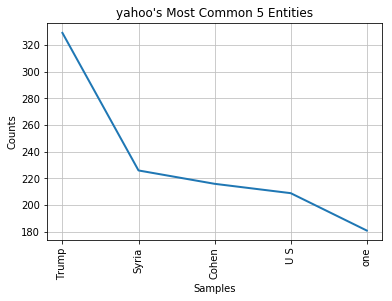

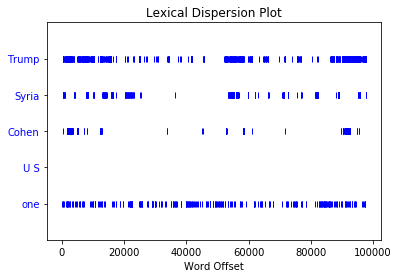

Common contexts of 'one, U S, Cohen, Syria, Trump' in yahoo
one: essentially_2010 greenberg_mess reputation_manhattan knowledge_defense
saying_thing though_ever so_certainly said_would issued_last
exactly_year including_reportedly unit_trump cohen_trump proposal_many
another_ukrainian including_threatening shred_read important_contest
line_day experience_said
U S: ('The following word(s) were not found:', 'u s')
Cohen: reuters_already michael_week question_personal raid_office related_cab
team_reveals interest_personal deeper_responded looking_business
related_on alliance_announced journal_mysterious many_business
gave_top named_national decade_spent noted_sat touted_support
noted_role whether_still
Syria: missile_striking attack_chemical nighttime_assault conflict_key
area_support saturday_russian france_saturday dealing_seven
weapon_russia ally_called russia_also weapon_said coming_president
attack_would option_wake envoy_estimated fired_trump fired_president
fired_get iraq_isi
Trump

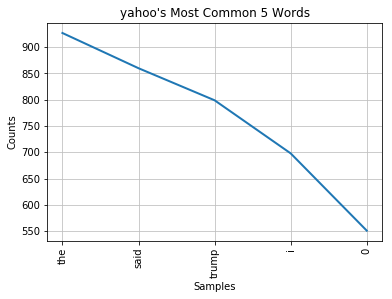

+-------------+---------------------+
|    Source   | avg_sentence_length |
+-------------+---------------------+
|  economist  |        21.927       |
|   nytimes   |        22.053       |
|   foxnews   |        22.527       |
|     cnn     |        22.584       |
| motherjones |        23.607       |
|     vox     |        24.106       |
|     wsj     |        24.212       |
|    yahoo    |        24.312       |
|  breitbart  |        25.505       |
+-------------+---------------------+
+-------------+-----------------+
|    Source   | avg_word_length |
+-------------+-----------------+
|    yahoo    |       4.74      |
|     vox     |      4.775      |
|   nytimes   |      4.786      |
|     cnn     |      4.795      |
|   foxnews   |      4.808      |
|  breitbart  |       4.88      |
| motherjones |      4.907      |
|     wsj     |      4.985      |
|  economist  |      5.094      |
+-------------+-----------------+
+-------------+------------------+
|    Source   | content_fract

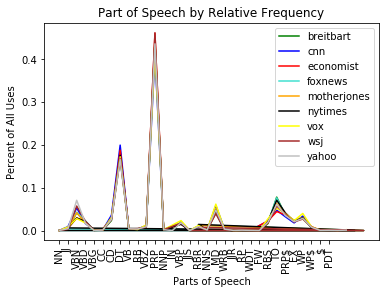

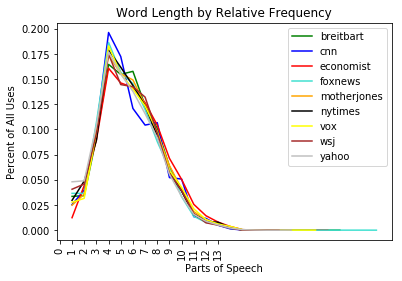

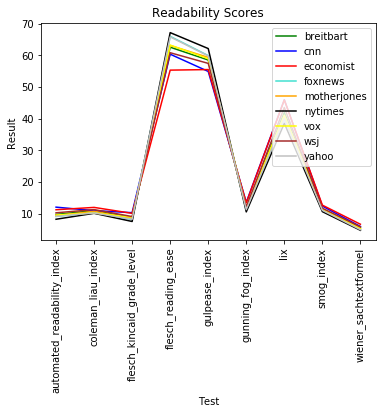

In [88]:
def main():
    getAndPrepareFiles(r"/Users/Jeremy/Documents/Computational Linguistics/files/*/*.txt")
    sanitizeAndAnalyze()
    Corpus.displayResults()

def getAndPrepareFiles(path):
    files = glob.glob(path)
    i=0
    while i < (len(files)):
        Corpus("", name=getNameFromPath(files[i])) #Create a new Corpus object 
        j = i
        while j < len(files) and getNameFromPath(files[i]) == getNameFromPath(files[j]):
            print (files[j])
            Corpus.database[len(Corpus.database)-1].addToCorpus(open(files[j], 'r').read())
            j+=1
        print (Corpus.database[len(Corpus.database)-1].name + " created with initial, unedited " + str(len(Corpus.database[len(Corpus.database)-1].corpus)) + " characters ")
        i=j

#Return media source aka NAME based on 'base_path/files/NAME/DATE.txt' file structure
def getNameFromPath(path): 
    return path[path.index('files')+6:path.index('.txt')-8]

def sanitizeAndAnalyze():
    for corpus in Corpus.database:
            corpus.readability()
            corpus.avgLength()
            corpus.tokenize()
            corpus.removePunctuation()
            corpus.removeStopwords()
            corpus.mostCommonEntities(scope=5)
            corpus.removeNamesOfPeople()
            corpus.removeRareWords()
            corpus.unifyCase()
            corpus.tenseAnalysis()
            corpus.lemma()
            corpus.wordAnalysis()
            corpus.corpusAnalysis()
            corpus.frequency(scope=5)
            corpus.lexicalDiversity(chunk_size=2000)

main()

## Class and methods for sanitizing and analyzing texts yielding results above

To keep track of all variables, each corpus was instantiated as a Corpus object, whose instance variables include the corpus’ name, text, and a variable for each of the other measurements listed in the analysis step. Additionally, when a new Corpus object is instantiated, it is added to a list named database; so, Corpus.database could easily either be indexed into or iterated over throughout the program, which aids in both testing and code simplicity. Further, each step during the sanitizing and analyzing step has its own dedicated function, each of which need to be called on a Corpus object. It should also be noted that some methods take either a scope or a chunk_size variable; these variables were set to 5 and 2000, respectively. Also, the third and last function called in main(), displayResults(), produces all of the quantitative output. 

In [27]:
class Corpus:
    database = []
    tag_fd_dict = {}
    word_length_dict = {}
    readability_dict = {}
    
    avg_sentence_length = None
    avg_word_length = None
    punctuation_percent = None
    content_fraction = None
    tense_analysis = []
    word_analysis = []
    lexical_diversity = None
    
    
    def __init__(self, corpus, name):
        self.corpus = corpus
        self.name = name 
        self.avg_sentence_length = None
        self.avg_word_length = None
        self.punctuation_percent = None
        self.content_fraction = None
        self.tense_analysis = []
        self.word_analysis = []
        self.lexical_diversity = None
        self.database.append(self)
        
    def addToCorpus(self, text):
        self.corpus += text
        if len(self.corpus) > 90000:
            self.corpus = self.corpus[:90000] #900000 limit because of Python 2-Spacy size limit
            
    def readability(self):
        doc = textacy.Doc(str(self.corpus), lang='en')
        ts = textacy.TextStats(doc)
        self.readability_dict[self.name] = ts.readability_stats
    
    def avgLength(self): 
        tokenizer = nltk.data.load('tokenizers/punkt/english.pickle') #Adapted from: https://mailman.uib.no/public/corpora/2007-October/005426.html
        num_sentences = len(tokenizer.tokenize(self.corpus))
        total_characters = len(re.findall('[a-zA-Z]',self.corpus))
        total_words = len(self.corpus.split())
        self.avg_sentence_length = round(float(total_words)/num_sentences, 3)
        self.avg_word_length =  round(float(total_characters)/total_words, 3)
            
    def tokenize(self):
        self.corpus = word_tokenize(self.corpus)

    def removePunctuation(self): 
        nopunct = RegexpTokenizer(r'\w+')
        total_characters = 0
        for w in self.corpus:
            total_characters += len(w)
        self.corpus = nopunct.tokenize(str(self.corpus))
        punctuation = 0
        for w in self.corpus:
            punctuation += len(w)
        self.punctuation_percent = round((punctuation / total_characters), 3)

    def removeStopwords(self): #SRC: http://www.nltk.org/book/ch02.html 
        stopwords1 = nltk.corpus.stopwords.words('english')
        content = [w for w in self.corpus if w not in stopwords1 and w.upper() not in stopwords1]
        self.content_fraction = round(float(len(content)) / len(self.corpus), 3)
        self.corpus = [w for w in self.corpus if w not in stopwords1 and w.upper() not in stopwords1]

    def mostCommonEntities(self, scope):
        doc = textacy.Doc(str(" ".join(self.corpus)), lang='en')
        fdist = FreqDist(textacy.extract.named_entities(doc, drop_determiners=True))
        fdist2 = []
        for key, value in fdist.items():
            fdist2.append(str(key))
        fdist = FreqDist(fdist2)
        fdist.plot(scope, title = str(self.name + "\'s Most Common " + str(scope) + " Entities"))
        for item in list(fdist.most_common(scope)):
            self.word_analysis.append((str(item[0])))
        nltk.Text(self.corpus).dispersion_plot(self.word_analysis) #Visual frequency of word in corpus
            
    def removeNamesOfPeople(self):
        PN = PersonalNames.words()
        #doc = textacy.Doc(str(" ".join(self.corpus)), lang='en')
        #entities = list(textacy.extract.named_entities(doc, drop_determiners=True))
        #entities = [str(q) for q in bad]
        self.content = [w for w in self.corpus if w not in PN] #and w not in entities
        
    def unifyCase(self, case = "L"):
        if case == "L":
            self.corpus = [w.lower() for w in self.corpus]
        elif case == "U":
            self.corpus = [w.upper() for w in self.corpus]

    def tenseAnalysis(self): #SRC: http://www.nltk.org/book/ch02.html 
        fdist = FreqDist(self.corpus)
        modals = ['can', 'could', 'may', 'might', 'must', 'will']
        for m in modals:
            self.tense_analysis.append(fdist[m]) 

    def lemma(self): 
        wnl = nltk.WordNetLemmatizer()
        self.corpus = [wnl.lemmatize(t) for t in self.corpus]

    def removeRareWords(self):
        freq_dist = nltk.FreqDist(self.corpus)
        rarewords = [ k for (k,v) in freq_dist.items() if v == 1]
        self.corpus = [w for w in self.corpus if w not in rarewords]

    def wordAnalysis(self, keywords = None):
        if keywords == None:
            keywords = self.word_analysis
        print ("Common contexts of \'" + (", ").join(keywords) + "\' in " + self.name) 
        for word in keywords:
            print ( word + ": ", end = '')
            nltk.Text(self.corpus).common_contexts([str(word)])
            
        #table = PrettyTable(['Word', 'Used In Similar Context As'])
        #for word in keywords:  
        #    table.add_row([word, nltk.Text(self.corpus).similar(word)])
        #print (table.get_string()) 
        
        print("WORD \t\t\t Used In Similar Context As" ) 
        for word in keywords:
            print(str(word) + ": ", end = '')
            nltk.Text(self.corpus).similar(word)

    def corpusAnalysis(self):
        print (self.name + "'s Collocations aka Words Commonly Used Together: ")
        nltk.Text(self.corpus).collocations() 
        tag_fd = nltk.FreqDist(tag for (word, tag) in nltk.pos_tag(self.corpus))
        sum = 0
        for tag in tag_fd:
            sum += tag_fd[tag]
        for tag in tag_fd:
            tag_fd[tag] = tag_fd[tag] / sum
        #tag_fd.most_common() 
        #tag_fd.plot(title = self.name + "'s Each POS by Most Common by Relative %") 
        self.tag_fd_dict[self.name] = tag_fd
        
    def lexicalDiversity(self, chunk_size):
        if len(self.corpus)!=0:
            total_length= len(self.corpus)
            unique = 0
            for i in range(0, len(self.corpus), chunk_size):
                unique += len(set(self.corpus[i:i+chunk_size]))
            self.lexical_diversity = round(unique / total_length, 3)
            
    def frequency(self, scope):
        fdist = FreqDist(self.corpus)
        fdist.plot(scope, title = str(self.name + "'s Most Common " + str(scope) + " Words")) 
        fdist = FreqDist(len(w) for w in self.corpus)
        sum = 0
        for tag in fdist:
            sum += fdist[tag]
        for tag in fdist:
            fdist[tag] = fdist[tag] / sum
        #fdist.plot(title="Frequency of each word length by Relative %")
        self.word_length_dict[self.name] = fdist
    
    #https://spacy.io/usage/vectors-similarity
    def vectorAnalysis_unchunked():    
        first_row = ['Word Vectors: Unchunked'] 
        for corpus in Corpus.database:  
            first_row.append(corpus.name[:3])
        table = PrettyTable(first_row)
        i = 0
        while i < len(Corpus.database):  
            doc1 = nlp(str(" ".join(Corpus.database[i].corpus)))
            row = [Corpus.database[i].name]
            row += [""]*(i)
            j = i
            while j < len(Corpus.database):  
                doc2 = nlp(str(" ".join(Corpus.database[j].corpus)))
                row.append(round(doc1.similarity(doc2), 3))
                j += 1
            table.add_row(row)
            i += 1
        print (table.get_string())
        
    def vectorAnalysis_chunk(chunk_size):    
        first_row = ['Word Vectors: ' + str(chunk_size) + "-word chunks"]
        for corpus in Corpus.database:  
            first_row.append(corpus.name[:3])
        table = PrettyTable(first_row)
        i = 0
        while i < len(Corpus.database):        
            row = [Corpus.database[i].name]
            row += [""]*(i)
            j = i
            while j < len(Corpus.database):
                vec = 0
                for k in range(0, len(Corpus.database[i].corpus), chunk_size):
                    doc1 = nlp(str(" ".join(Corpus.database[i].corpus[k:k+chunk_size])))
                    for l in range(0, len(Corpus.database[j].corpus), chunk_size):
                        doc2 = nlp(str(" ".join(Corpus.database[j].corpus[l:l+chunk_size])))
                        sim = doc1.similarity(doc2)
                        vec += (sim) / (np.ceil(len(Corpus.database[i].corpus)/chunk_size)*np.ceil(len(Corpus.database[j].corpus)/chunk_size))
                row.append(round(vec, 2))
                j += 1
            table.add_row(row)
            i += 1
        print (table.get_string())
        

    def displayResults(chunk_size=2000):
        for datapoint in dir(Corpus):
            if not datapoint.startswith('__') and not callable(getattr(Corpus,datapoint)) and datapoint!='database' and datapoint!='tag_fd_dict' and datapoint!='word_length_dict' and datapoint!='readability_dict':
                table = PrettyTable(['Source', datapoint])
                for corpus in Corpus.database:  
                    table.add_row([corpus.name, getattr(corpus, datapoint)])
                print (table.get_string(sortby=datapoint))
        

        #Plotting adapted from Stackoverflow
        colors = ["green", "blue", "red", "turquoise", 'orange', 'black', 'yellow', 'brown', 'silver']
        for i, label in enumerate(Corpus.tag_fd_dict):
            lists = sorted(Corpus.tag_fd_dict[label].items()) # sorted by key, return a list of tuples
            x, y = zip(*lists) # unpack a list of pairs into two tuples
            color = colors[i]
            plt1.plot(x, y, color=color, label=label)
        plt1.xticks(np.arange(0, len(Corpus.tag_fd_dict['cnn']), 1), Corpus.tag_fd_dict['cnn'].keys(), rotation=90)
        plt1.title('Part of Speech by Relative Frequency')
        plt1.xlabel("Parts of Speech")
        plt1.ylabel("Percent of All Uses")
        plt1.legend(loc="upper right")
        plt1.show()
        
        
        for i, label in enumerate(Corpus.word_length_dict):
            lists = sorted(Corpus.word_length_dict[label].items()) # sorted by key, return a list of tuples
            x, y = zip(*lists) # unpack a list of pairs into two tuples
            color = colors[i]
            plt1.plot(x, y, color=color, label=label)
        plt1.xticks(np.arange(0, 14, 1), rotation=90)
        plt1.title('Word Length by Relative Frequency')
        plt1.xlabel("Parts of Speech")
        plt1.ylabel("Percent of All Uses")
        plt1.legend(loc="upper right")
        plt1.show()
        
        #https://chartbeat-labs.github.io/textacy/getting_started/quickstart.html#analyze-a-doc
        for i, label in enumerate(Corpus.readability_dict):
            lists = sorted(Corpus.readability_dict[label].items()) # sorted by key, return a list of tuples
            x, y = zip(*lists) # unpack a list of pairs into two tuples
            color = colors[i]
            plt1.plot(x, y, color=color, label=label)
        plt1.xticks(np.arange(0, 9, 1), rotation=90)
        plt1.title('Readability Scores')
        plt1.xlabel("Test")
        plt1.ylabel("Result")
        plt1.legend(loc="upper right")
        plt1.show()
        
        #Corpus.vectorAnalysis_unchunked() 
        #Corpus.vectorAnalysis_chunk(chunk_size)

In [ ]:
#ADDITIONAL NONUSED FUNCTIONS
def avg_word_length(corpus):
     #total_words = tokenize(corpus)
    #non_period_punctuation = list('!"#$%&\'()*+,-/:;<=>?@[\]^_`{|}~') #Everything in string.punctuation except for .
    #total_words = len([token for token in total_words if token not in non_period_punctuation])
    num_words = len(corpus)
    num_characters = 0
    for word in corpus:
         num_characters += len(word)
    return float(num_characters)/num_words

def comparing_word(word1, word2): #help (wn)
    word1 = wn.synset(word1 + '.n.01') 
    word2 = wn.synset(word2 + '.n.01')
    print (word1.path_similarity(word2)) #Gives expected path similarity between words
    
def unusual_words(corpus, scope): #SRC: http://www.nltk.org/book/ch02.html 
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = [w for w in corpus if w.lower() not in english_vocab]
    fdist = FreqDist(unusual)
    print ("\nThe most common " + str(scope) + " words not expected by NLTK: \n" + str(fdist.most_common(scope)))
    return 

In [77]:
Corpus.vectorAnalysis_chunk(10000) #Naive method: Takes several hours to run; reran 2000 to confirm results. 

+---------------------------------+------+------+------+------+------+------+------+------+------+
| Word Vectors: 10000-word chunks | bre  | cnn  | eco  | fox  | mot  | nyt  | vox  | wsj  | yah  |
+---------------------------------+------+------+------+------+------+------+------+------+------+
|            breitbart            | 0.97 | 0.98 | 0.98 | 0.98 | 0.98 | 0.98 | 0.97 | 0.98 | 0.98 |
|               cnn               |      | 1.0  | 0.99 | 0.99 | 0.99 | 0.99 | 0.98 | 0.99 | 0.99 |
|            economist            |      |      | 1.0  | 0.99 | 0.99 | 0.99 | 0.98 | 0.99 | 0.98 |
|             foxnews             |      |      |      | 1.0  | 1.0  | 1.0  | 0.99 | 0.99 | 0.99 |
|           motherjones           |      |      |      |      | 1.0  | 1.0  | 0.99 | 0.99 | 0.99 |
|             nytimes             |      |      |      |      |      | 1.0  | 0.99 | 0.99 | 0.99 |
|               vox               |      |      |      |      |      |      | 0.99 | 0.98 | 0.98 |
|         

## *Main2(): Calls all of the functions defined below*

### Approach: To analyze the sources collected, I implemented several approaches. One such library used was  Spacy, which has language-specific data necessary to process text in several languages. (Below, it was used to find keyterms() as well as to sanitize the corpus in the helper function process_text().) However, as discussed, there are more accurate ways to model passages of raw text than just looking for linguistic attributes in each individual text; consequently, a tf_idf() function was defined which takes into account what words are popular in the given context. Additionally, to provide a cleaner, quantitative result, PCA and heatmaps were calculated to visualize how the texts related to one another. Finally, Sklearn and Mallet were used to classify whether political leaning is a valid attribute to distinguish outlets from another.  

### Selected Results: 
- The keyterms() result corroborates earlier findings indetified by Spacy's most_common_entities and NLTK's collocations() that  President Trump is a very frequent topic in the current political climate
- Based on the results of topics():
    - WSJ, Economist, NYT discuss more economics than other outlets (see Topic16)
    - Regardless of stance of the publication, the investigations into the Trump White House is coverered (see Topic5)
- Based on the PCA and heatmap, Yahoo seems to be more left-leaning than expected: In the PCA, Vox is the closest situated to Mother Jones and Vox. Additionally, in the heatmap of distances Yahoo is closely related to Mother Jones and Vox.  

/Users/Jeremy/Documents/Computational Linguistics/files/breitbart/4_14_18.txt
/Users/Jeremy/Documents/Computational Linguistics/files/breitbart/4_15_18.txt
/Users/Jeremy/Documents/Computational Linguistics/files/breitbart/4_16_18.txt
/Users/Jeremy/Documents/Computational Linguistics/files/breitbart/4_17_18.txt
/Users/Jeremy/Documents/Computational Linguistics/files/breitbart/4_18_18.txt
/Users/Jeremy/Documents/Computational Linguistics/files/breitbart/4_19_18.txt
/Users/Jeremy/Documents/Computational Linguistics/files/breitbart/4_23_18.txt
/Users/Jeremy/Documents/Computational Linguistics/files/breitbart/4_25_18.txt
breitbart created with initial, unedited 90000 characters 
/Users/Jeremy/Documents/Computational Linguistics/files/cnn/4_12_18.txt
/Users/Jeremy/Documents/Computational Linguistics/files/cnn/4_14_18.txt
/Users/Jeremy/Documents/Computational Linguistics/files/cnn/4_15_18.txt
/Users/Jeremy/Documents/Computational Linguistics/files/cnn/4_16_18.txt
/Users/Jeremy/Documents/Compu

cnn: 
( CNN Randy Bryce. A mustache-clad iron worker. Who. His nickname.
Iron Stache. National attention. His pointed attacks. House Speaker
Paul Ryan. Who. November 's election. Ryan. Wednesday. Bryce. The



economist: 
DECEMBER 4th, Honduras, General elections, Electoral commission. TSE.
Which candidate. The winner. 99.98 %. The vote. The country.
Conservative president. Juan Orlando Hernández. The one-round
electio



foxnews: 
CIA Director Mike Pompeo, The next secretary, State, His Senate
confirmation hearing, Aggressive moves. Russia. Pompeo-- Lawmakers--
The Senate Foreign Relations Committee-- The administration 's work



motherjones: 
News? Our free newsletters. Friday- Rep. Trey Gowdy- R-S.C.- The
chair- The House Oversight committee- Environmental Protection Agency
Administrator Scott Pruitt- The GOP-controlled committee- Its
inv



nytimes: 
Lawmakers. A balanced-budget amendment. A fig leaf. Fiscal
responsibility. Such an irresponsible spending bill. A painful few
months. Growing budget deficits. December. Republicans. The passage.
An ov



vox: 
Your income tax return. The last minute. This annual ritual. Busywork.
A bill. Sen. Elizabeth Warren. D-MA. Taxes. Americans. The tax prep
industry 's attempts. Taxes. The Tax Filing Simplification Ac



wsj: 
The Senate, Andrew Wheeler, Deputy administrator, The Environmental
Protection Agency, The agency, No . 2 post. The support. Three
Democrats. The vote. The chamber Mr. Wheeler Nomination The stakes Th



yahoo: 
A time machine The 2018 Lexus GX. Sale. A few minor updates. A 2018
model. The global Toyota Land Cruiser Prado. The Lexus RX. Lexus LX.
Its age. A seller. Sales. Fact. The GX. Its best year. The U.S.



9 docs in corpus
1649 sentences in corpus
79818 tokens in corpus

breitbart

syria, city, sunday, strike, u, assad, syrian, state, time, people, country,
year, attack, ally, saturday, chemical, russia, russian, weapon, president

cnn

republican, democrat, seat, trump, district, state, democratic, cuomo, party,
election, president, year, t, house, new, campaign, rourke, race, people, gop

economist

government, mr, country, party, year, russia, vote, president, election, bill,
america, republican, tax, russian, american, trump, army, rule, turkey, good

foxnews

trump, president, state, republican, house, pompeo, news, people, t, law, ryan,
time, gop, report, vote, senate, russia, conservative, congress, fox

motherjones

homan, trump, president, ice, year, t, people, libby, comey, state, time, new,
attack, report, immigrant, administration, friday, immigration, congress, broidy

nytimes

mr, year, security, trump, work, art, new, photo, man, people, t, president,
state, bear, republic

/Users/Jeremy/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


┌───┬─────────────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┐
│   │             │     0 │     1 │     2 │     3 │     4 │     5 │     6 │     7 │     8 │     9 │    10 │    11 │    12 │    13 │    14 │    15 │    16 │    17 │    18 │    19 │
├───┼─────────────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ 0 │ breitbart   │       │       │       │       │       │       │       │       │       │       │       │       │       │       │       │ 1.00  │       │       │       │       │
├───┼─────────────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┼───────┤
│ 1 │ cnn         │       │       │       │       │       │       │       │       │       │       │ 

	 0.21 economist
	 0.12 nytimes
	 0.15 wsj

	tax 32; senate 30; trade 28; business 28; ms 27; main 26; economy 25; health 22;
	single 22; hard 21; senior 21; energy 20; politicians 20; spending 20; half 19;
	free 18; bank 18; economic 17; private 16; small 16; measures 15; school 15;
	mexico 15; boss 14; building 14; cost 14; debt 14; recently 14; 8 13; children
	13; failed 13; rates 13; rest 13; short 13; sites 13; owner 13; politics 13; buy
	13; era 12; ground 12; independent 12; directly 12; exchange 12; worker 12;
	earlier 11; european 11; expected 11; income 11; named 11; popular 11

Topic19
	 0.46 breitbart

	_ 85; snow 45; storm 34; sunday 27; south 21; inches 20; minneapolis 20; heavy
	19; league 19; centimeters 18; wisconsin 18; haley 17; par 17; census 15; game
	15; turtle 15; winds 15; flights 14; macron 14; minnesota 14; alleged 13; cosby
	13; title 13; town 13; airport 12; blizzard 12; champions 12; dakota 12;
	nebraska 12; weather 12; conditions 11; expected 11; foreign 1

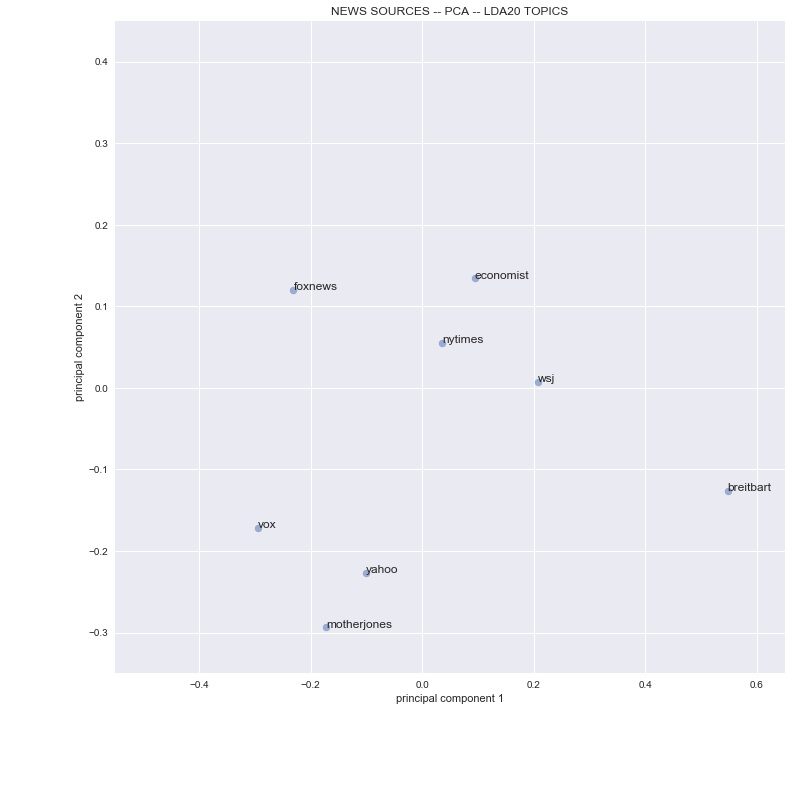

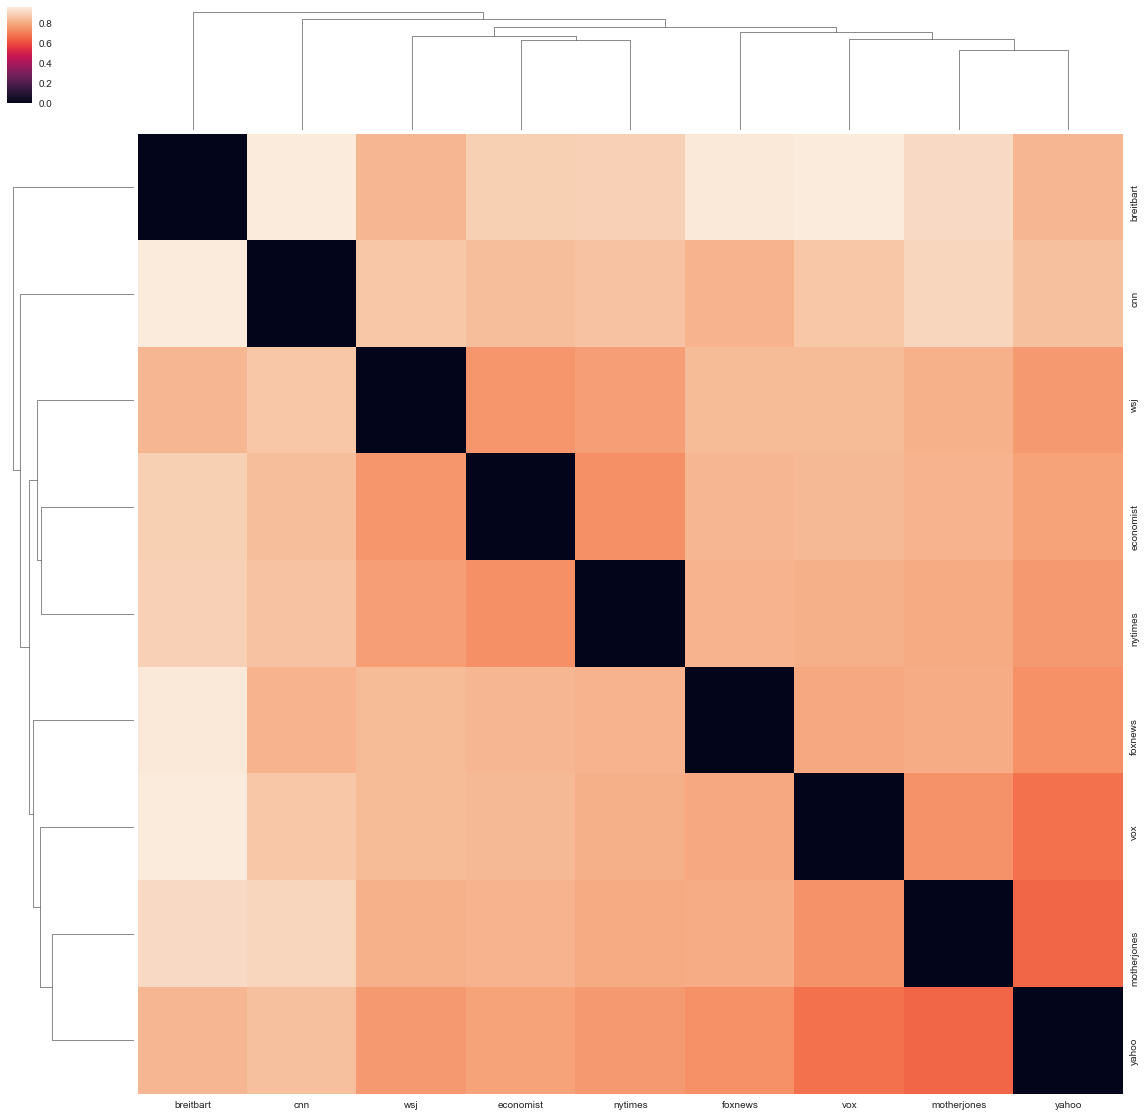

In [28]:
def main2():
    getAndPrepareFiles(r"/Users/Jeremy/Documents/Computational Linguistics/files/*/*.txt")
    for corpus in Corpus.database:
            corpus.tokenize()
            simplify_text(corpus, scope=200)
            pos_text(corpus, scope=20)
            corpus.removePunctuation()
    corpus = keyterms()
    topics(corpus)
    res = tf_idf()
    res = pca(res[0], res[1])
    linkage_matrix(res)
    main_classify()
main2()

## Display only the main content of each sentence using Textacy's part of speech-tagging capabilities

In [6]:
def simplify_text(corpus, scope):
    print (corpus.name + ': '),
    pdoc = nlp(str((' '.join(corpus.corpus))))
    all_noun_chunks = []
    for s in pdoc.sents:
        last_punct = ''
        for t in s:
            if t.pos_ == 'PUNCT' and t.text not in [u'—', u'”', '(', ')', u'“']:
                last_punct = t.text.replace(u'—', '')
        for c in s.noun_chunks:
            is_just_pronoun = False
            if len(c) == 1:
                for t in c:
                    if t.pos_ == 'PRON':
                        is_just_pronoun = True
            if is_just_pronoun == False:
                all_noun_chunks.append((c.text[0].upper() + c.text[1:] + last_punct).replace(u'“', ''))
    if len(all_noun_chunks) > 0:
        print ('\n'.join(textwrap.wrap(' '.join(all_noun_chunks), 70))[:scope] + '\n')

## Present a visual sentence dependency using displaCy

In [7]:
 def pos_text(corpus, scope):
    doc = nlp(str((' '.join(corpus.corpus)))[:scope])
    for s in doc.sents:
        s_doc = nlp(str(s)) 
        displacy.render(s_doc, jupyter=True, style='dep')

## Determine the top words in each corpus using textacy's .keyterms functionality 

In [8]:
def info(corpus):
    print (str(corpus.n_docs) + ' docs in corpus')
    print (str(corpus.n_sents) + ' sentences in corpus')
    print (str(corpus.n_tokens) + ' tokens in corpus')

def keyterms():
    corpus_input = []
    for corpus in Corpus.database:
        source = corpus.name
        raw_text = corpus.corpus
        selected_tokens = []
        doc = nlp(str(raw_text))
        for t in doc:
            if t.is_stop == False and t.is_punct == False and t.is_space == False:
                if t.lemma_ != '-PRON-':
                    selected_tokens.append(t.lemma_)
        corpus_input.append({
                       'source': source, 
                       'raw_text': raw_text, 
                       'selected_text': ' '.join(selected_tokens)})

    corpus = textacy.Corpus(
                u'en', 
                texts = [str(i['selected_text']) for i in corpus_input],
                metadatas = [{'source': i['source']} for i in corpus_input])
    info(corpus)
    for doc in corpus:
        print ('\n' + doc.metadata['source'] + '\n')
        top_words = []
        for w in textacy.keyterms.textrank(doc, n_keyterms=20):
            top_words.append(w[0])
        print ('\n'.join(textwrap.wrap(', '.join(top_words), 80)))
    return corpus

## Determine document-topic percentages (which topics make up what percentage of each document) using Textacy's topic modelling  

In [9]:
def make_printable(topic_pcts):
    printable_pcts = []
    for pct in topic_pcts:
        formatted_pct = '%.2f' % pct
        if formatted_pct == '0.00':
            formatted_pct = '    '
        printable_pcts.append(formatted_pct)
    return printable_pcts

def topics(corpus):
    vectorizer = textacy.Vectorizer(tf_type='linear', apply_idf=False, apply_dl=False,  min_df=2, max_df=26)
    doc_term_matrix = vectorizer.fit_transform((doc.to_terms_list(ngrams=1, named_entities=True, as_strings=True) 
                                                   for doc in corpus))
    model = textacy.TopicModel('lda', n_topics=20)
    model.fit(doc_term_matrix)
    doc_topic_matrix = model.transform(doc_term_matrix)
    
    topic_headings = []
    for a in range(len(doc_topic_matrix[0])):
        topic_headings.append(str(a).rjust(5))
    results =[['', ''] + topic_headings]
    for a in range(len(doc_topic_matrix)):
        results.append([a, corpus[a].metadata['source']] + make_printable(doc_topic_matrix[a]))
    print (tabletext.to_text(results))

## Determine the most common words in each corpus based on the inter-document frequencies using Gensim's latent Dirichlet allocation (LDA) modeling

In [10]:
def process_text(text, document_frequencies=None, low_df=None, high_df=None):
    tokens = []
    doc = nlp((' '.join(text)))
    if document_frequencies==None:
        for token in doc:
            if token.pos_ not in ['SPACE', 'PUNCT'] and \
                token.tag_ not in ['PRP', 'PRP$'] and \
                token.is_stop == False and token.lemma_ not in ['\'s']:            
                tokens.append(token.lemma_)    
    else:
        for token in doc:
            if token.pos_ not in ['SPACE', 'PUNCT'] and \
                token.tag_ not in ['PRP', 'PRP$'] and \
                token.is_stop == False and token.lemma_ not in ['\'s'] and \
                document_frequencies[token.lemma_] > low_df and \
                document_frequencies[token.lemma_] < high_df:
                tokens.append(token.text.lower())
    return tokens

def tf_idf():
    tokenized_corpus = [process_text(corpus.corpus) for corpus in Corpus.database]
    gensim_dictionary = corpora.Dictionary(tokenized_corpus)
    gensim_corpus = [gensim_dictionary.doc2bow(text) for text in tokenized_corpus]
    tfidf_model = models.TfidfModel(gensim_corpus)
    document_frequencies = dict([(gensim_dictionary[word], (float(document_count) / len(tokenized_corpus))) 
                                 for word, document_count in tfidf_model.dfs.items()])
    tokenized_corpus = [process_text(corpus.corpus, document_frequencies, .05, .95) for corpus in Corpus.database]
    N_TOPICS = 20
    gensim_dictionary = corpora.Dictionary(tokenized_corpus)
    gensim_corpus = [gensim_dictionary.doc2bow(text) for text in tokenized_corpus]
    print (str(len(gensim_dictionary)) + " is the length of the gensim_dictionary")
    print (str(len(gensim_corpus)) + " is the length of the gensim_corpus")
    lda_model = LdaMallet('/Users/Jeremy/Downloads/mallet-2.0.8/bin/mallet',
                        corpus=gensim_corpus, 
                        id2word=gensim_dictionary,
                        optimize_interval=10,
                        num_topics=N_TOPICS)
    gensim_lda_corpus = lda_model[gensim_corpus]
    print (str(len(gensim_lda_corpus)) + " is the length of the gensim_lda_corpus")
    topic_word_counts = defaultdict(lambda: defaultdict(int))
    word_topics = lda_model.load_word_topics()
    for topic_n, word_counts in enumerate(word_topics):
        for word_n, word_count in enumerate(word_counts):
            topic_word_counts[topic_n][gensim_dictionary[word_n]] = word_count    
    for topic_n in range(N_TOPICS):
        n_documents = 0
        for doc in gensim_lda_corpus:
            for t in doc:
                if t[0] == topic_n and t[1] > 0.1:
                    n_documents += 1          
        if n_documents > 0:
            print ('\n' + 'Topic' +  str(topic_n))
            for a, doc in enumerate(gensim_lda_corpus):
                for t in doc:
                    if t[0] == topic_n and t[1] > 0.1:
                        print( '\t', '%.02f' % t[1], Corpus.database[a].name)
            printed_words = []
            for w in Counter(topic_word_counts[topic_n]).most_common(50):
                printed_words.append(w[0] + ' ' + str(int(w[1])))
            print ('\n\t' + '\n\t'.join(textwrap.wrap('; '.join(printed_words), 80)))
    return gensim_lda_corpus, N_TOPICS

## Principal component analysis (PCA) using Gensim's LDA model. PCA selects the successive components that explain the maximum variance in the signal.

In [20]:
def pca(gensim_lda_corpus, N_TOPICS):
    lda_matrix = corpus2dense(gensim_lda_corpus, N_TOPICS)
    print ('lda_matrix.shape:' +  str(lda_matrix.shape))
    lda_matrix = lda_matrix.T
    print ('lda_matrix.shape: ' + str(lda_matrix.shape))
    pca = PCA(n_components=2)
    results = pca.fit_transform(lda_matrix)
    print (str(len(results)) + 'is the length of results')
    print ('explained_variance_ratio_:' + str(pca.explained_variance_ratio_))
    x = []
    y = []
    for r in results:
        x.append(r[0])
        y.append(r[1])
    plt.figure(figsize=(12,12))
    plt.title('NEWS SOURCES -- PCA -- LDA' + str(N_TOPICS) + ' TOPICS')
    plt.xlabel('principal component 1')
    plt.ylabel('principal component 2')
    plt.ylim(-0.35, 0.45)
    plt.xlim(-0.55, 0.65)
    plt.scatter(x, y, s=50, alpha=.5)
    for i, corpus in enumerate(Corpus.database):
        plt.annotate(corpus.name, (x[i], y[i]))
    return lda_matrix

## A heatmap of distances, combined with heirarchical clustering presented as a dendrogram

In [12]:
def linkage_matrix(lda_matrix):
    distances = pdist(lda_matrix, 'euclidean')
    print ('distances.shape', distances.shape)
    linkage_matrix = linkage(distances, 'complete')
    print ('linkage_matrix.shape', linkage_matrix.shape)
    rectagular_distance_matrix = squareform(distances)
    labels = [corpus.name for corpus in Corpus.database]
    distance_data_frame = pd.DataFrame(rectagular_distance_matrix, index=labels, columns=labels)
    sns.set(color_codes=True)
    plt.figure(figsize=(40, 40))
    g = sns.clustermap(distance_data_frame, 
                       row_linkage=linkage_matrix, 
                       col_linkage=linkage_matrix,
                       figsize=(20, 20))

## Classify texts using the NLTK Naive Bayes classifier via Textblob

In [13]:
def print_most_informative_sklearn(dictionary, classifier, n_to_list):
    results = []
    for a in range(0, len(classifier.feature_log_prob_[0])):
            class_0 = (math.e**classifier.feature_log_prob_[0][a])
            class_1 = (math.e**classifier.feature_log_prob_[1][a])
            if class_0 > class_1:
                results.append([(class_0 / class_1), 
                                [dictionary[a].ljust(20), 'conservative : progressive', '\t', 
                                     '%.1f' % (class_0 / class_1), ':', str(1.0)]])
            else:
                results.append([(class_1 / class_0), 
                                [dictionary[a].ljust(20), 'progressive : conservative', '\t', 
                                     '%.1f' % (class_1 / class_0), ':', str(1.0)]])
    results.sort(reverse=True)
    for r in results[:n_to_list]:
        print (' '.join(r[1]))

def get_random_slice(corpus, parm_slice_length):
    last_possible_starting_position = len(corpus) - parm_slice_length - 1
    starting_position = random.randint(0, last_possible_starting_position)
    ending_position = starting_position + parm_slice_length
    token_slice = corpus[starting_position: ending_position]
    return token_slice

def main_classify():
    start_time = time.time()
    
    my_corpora = {}
    categories = ['conservative', 'progressive']
    for category in categories:
        my_corpora[category] = [] 
    for corpus in Corpus.database:
        if corpus.name == 'foxnews' or corpus.name == 'breitbart':
            corpus.removeStopwords()
            my_corpora['conservative'].append((corpus.corpus))
        if corpus.name == 'motherjones' or corpus.name == 'vox':
            corpus.removeStopwords()
            my_corpora['progressive'].append((corpus.corpus))
    training_sources = []
    training_samples_nltk = []
    training_samples_sklearn = []
    training_labels = []

    testing_sources = []
    testing_samples_nltk = []
    testing_samples_sklearn = []
    testing_labels = []
    
    for folder in ['progressive', 'conservative']:
        for text in my_corpora[folder]:
            training_slice = get_random_slice(text, 1000)

            training_samples_nltk.append((' '.join(training_slice) , folder))
            training_samples_sklearn.append(training_slice)
            training_labels.append(folder)

            testing_slice = get_random_slice(text, 1000)

            testing_samples_nltk.append((' '.join(testing_slice) , folder))
            testing_samples_sklearn.append(testing_slice)
            testing_labels.append(folder)

    print ("Naive Bayes classifier".upper())
    cl = NaiveBayesClassifier(training_samples_nltk)
    accuracy = cl.accuracy(testing_samples_nltk)
    print ('accuracy', accuracy)
    print (cl.show_informative_features(25))
    stop_time = time.time()
    
    print ("\n\nsklearn Naive Bayes classifier using the BernoulliNB classifier".upper())
    dictionary = corpora.Dictionary(training_samples_sklearn + testing_samples_sklearn)
    training_corpus = [dictionary.doc2bow(text) for text in training_samples_sklearn]
    testing_corpus = [dictionary.doc2bow(text) for text in testing_samples_sklearn]
    training_matrix = matutils.corpus2dense(training_corpus, len(dictionary))
    training_matrix = training_matrix.T
    print ('training_matrix', training_matrix.shape)
    testing_matrix = matutils.corpus2dense(testing_corpus, len(dictionary))
    testing_matrix = testing_matrix.T
    print ('testing_matrix', testing_matrix.shape)
    classifier = BernoulliNB()
    classifier.fit(training_matrix, training_labels)
    score = classifier.score(testing_matrix, testing_labels)
    print ('accuracy', score)
    print_most_informative_sklearn(dictionary, classifier, 20)
    
    print ('Total execution: ', (stop_time - start_time), ' seconds')